In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import powerlaw

Q1

In [5]:
data = []
for l in open("business.json").readlines():
    line = json.loads(l) #from json string to python dictionary
    data.append(line)

In [6]:
review_counts = [] 
for business in data:
    review_counts.append(business['review_count'])

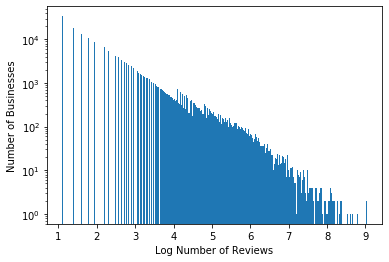

Calculating best minimal value for power law fit
/Users/David/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


AlphaL\: 2.879181869906935


/Users/David/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [7]:
log_review_counts = np.log(review_counts)
plt.hist(log_review_counts, log=True, cumulative=False, histtype='bar', bins=400)
plt.xlabel('Log Number of Reviews')
plt.ylabel('Number of Businesses')
plt.show()


results = powerlaw.Fit(review_counts, discrete=True)
print('AlphaL\:', results.power_law.alpha)
R, p = results.distribution_compare('power_law', 'lognormal')

/Users/David/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


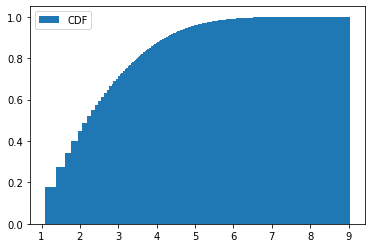

In [8]:
plt.hist(log_review_counts, normed=True, cumulative=True, label='CDF', bins=500)
plt.legend()
plt.show()

/Users/David/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


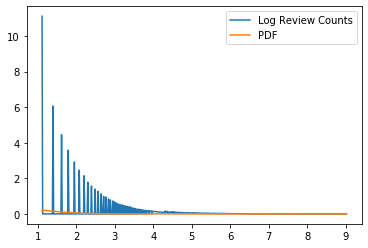

In [9]:
bins = 500
histogram, bins = np.histogram(log_review_counts, bins=bins, normed=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(bin_centers)
plt.plot(bin_centers, histogram, label="Log Review Counts")
plt.plot(bin_centers, pdf, label='PDF')
plt.legend()
plt.show()

We concluded that the number of reviews per business is a power law distribution because the log(reviews) graph is almost a straight line. We also examined the PDF, CDF graphs.
We calculated alpha=2.879181869906935.

Q2

In [ ]:
business_df = pd.read_json ("business.json", lines=True)

In [ ]:
IL_bzn = business_df[business_df['state'] == 'IL']
SC_bzn = business_df[business_df['state'] == 'SC']

In [ ]:
print(stats.ks_2samp(IL_bzn['review_count'].tolist(), SC_bzn['review_count'].tolist()))

Steps:
    1. Load business.json data
    2. Create two arrays for only IL and SC businesses
    3. Use scipy.stats.ks_2samp to execute KS test

The pvalue of the KS test is 0.00045 therefore we can reject the null hypothesis and say that the distribution of review_counts for IL and SC are from different distributions.

Q3

In [ ]:
IL_bzn = business_df[business_df['state'] == 'IL']
AZ_bzn = business_df[business_df['state'] == 'AZ']

In [ ]:
IL_mean = IL_bzn['review_count'].mean()
AZ_mean = AZ_bzn['review_count'].mean()

print(IL_mean)
print(AZ_mean)

stats.ttest_ind(IL_bzn['review_count'].tolist(), AZ_bzn['review_count'].tolist(), equal_var=False)

The two sided t-test pvalue=2.2765973643715597e-39 which is less than 0.05 significance level therefore we can reject the null hypothesis and conclude the mean review_counts for IL and AZ are significantly different.

In [ ]:
ON_bzn = business_df[business_df['state'] == 'ON']
ON_mean = ON_bzn['review_count'].mean()

print(IL_mean)
print(ON_mean)

stats.ttest_ind(IL_bzn['review_count'].tolist(), ON_bzn['review_count'].tolist(), equal_var=False)

The two sided t-test pvalue=0.1314223880540059 which is greater than 0.05 significance level therefore we cannot reject the null hypothesis and cannot conclude the mean review_counts for IL and AZ are significantly different.

Q4

In [ ]:
open_less = business_df[(business_df['is_open'] == 1) & (business_df['review_count'] <= 20)].shape[0]
open_greater = business_df[(business_df['is_open'] == 1) & (business_df['review_count'] > 20)].shape[0]
closed_less = business_df[(business_df['is_open'] == 0) & (business_df['review_count'] <= 20)].shape[0]
closed_greater = business_df[(business_df['is_open'] == 0) & (business_df['review_count'] > 20)].shape[0]

print(open_less, open_greater, closed_less, closed_greater)

col1 = open_less + open_greater
col2 = closed_less + closed_greater
row1 = open_less + closed_less
row2 = open_greater + closed_greater
total = open_less + open_greater + closed_less + closed_greater

a = row1 * col1 / total
b = row1 * col2 / total
c = row2 * col1 / total
d = row2 * col2 / total

observed = [open_less, open_greater, closed_less, closed_greater]
expected = [a, b, c, d]

stats.chisquare(observed, expected, ddof=1)

The chi square pvalue < 0.001 therefore we can reject the null hypothesis and cannot conclude that the two events (business closing and reviews<20) are dependent.

In [ ]:
open_less = business_df[(business_df['is_open'] == 1) & (business_df['stars'] <= 2.5)].shape[0]
open_greater = business_df[(business_df['is_open'] == 1) & (business_df['stars'] > 2.5)].shape[0]
closed_less = business_df[(business_df['is_open'] == 0) & (business_df['stars'] <= 2.5)].shape[0]
closed_greater = business_df[(business_df['is_open'] == 0) & (business_df['stars'] > 2.5)].shape[0]

print(open_less, open_greater, closed_less, closed_greater)

col1 = open_less + open_greater
col2 = closed_less + closed_greater
row1 = open_less + closed_less
row2 = open_greater + closed_greater
total = open_less + open_greater + closed_less + closed_greater

a = row1 * col1 / total
b = row1 * col2 / total
c = row2 * col1 / total
d = row2 * col2 / total

observed = [open_less, open_greater, closed_less, closed_greater]
expected = [a, b, c, d]

print(stats.chisquare(observed, expected, ddof=1))

The chi square pvalue < 0.001 therefore we can reject the null hypothesis and cannot conclude that the two events (business closing and reviews<20) are dependent.

Q5

In [2]:
user_data = []
for l in open("user.json").readlines():
    line = json.loads(l)
    user_data.append(line)
# users = pd.read_json ("user.json", lines=True)

In [3]:
review_counts = []
fan_counts = []
useful_counts = []
funny_counts = []

for user in user_data:
    review_counts.append(user['review_count'])
    fan_counts.append(user['fans'])
    useful_counts.append(user['useful'])
    funny_counts.append(user['funny'])

In [4]:
pearson_r1, pearson_pval1 = stats.pearsonr(review_counts, fan_counts)
pearson_r2, pearson_pval2 = stats.pearsonr(useful_counts, funny_counts)
pearson_r3, pearson_pval3 = stats.pearsonr(useful_counts, fan_counts)

print('Pearson:', pearson_r1, pearson_r2, pearson_r3)

spearman1, p1 = stats.spearmanr(review_counts, fan_counts)
spearman2, p2 = stats.spearmanr(useful_counts, funny_counts)
spearman3, p3 = stats.spearmanr(useful_counts, fan_counts)

print('Spearman:', spearman1, spearman2, spearman3)

Pearson: 0.5506816309257403 0.9647129071745486 0.7026543853857063
Spearman: 0.5386287759112771 0.7813877781869568 0.5530478606753861


Reviews vs. Fans

    Pearson = 0.5506816309257403
    Spearman = 0.5386287759112771

Useful vs. Funny

    Pearson = 0.9647129071745486
    Spearman = 0.7813877781869568

Useful vs. Fans

    Pearson = 0.7026543853857063
    Spearman = 0.5530478606753861